In [1]:
# igraph is a library compatible with Python, R, and C/C++
# We will use Python in this tutorial

from igraph import *
from random import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
# We create a graph object
g = Graph()

# This graph has 'N' nodes
N = 20

# Each pair of nodes is connected with probability 'p'
p = 0.2

In [3]:
# This first graph we study is the Erdős-Renyi random graph, often our 'null model'

g.add_vertices(N) # Add N edges to our graph

# Add edges with probability 'p'
edges = []
for i in range(N):
    for j in range(i + 1, N):
        if random() < p:
            edges += [(i, j)]
g.add_edges(edges)
print('This graph has [%d] edges.' % g.ecount())

This graph has [37] edges.


In [4]:
# Let's visualize this graph!

g.write_svg("graph.svg", layout=g.layout_circle())

In [ ]:
# Now let's look at some structural properties

In [5]:
# Create a larger Erdős-Renyi random graph (for nicer statistics)
N = 1000
p = 0.01
G = Graph.Erdos_Renyi(N, p)

In [6]:
# Look at the mean number of edges per node

degrees = G.degree()
print('The average degree is [%d].' % mean(degrees))
print('The maximum degree is [%d].' % max(degrees))
print('This graph has [%d] links.' % G.ecount())

The average degree is [10].
The maximum degree is [22].
This graph has [5102] links.


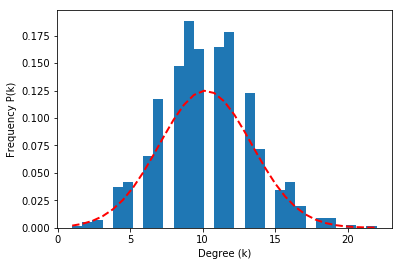

In [7]:
# We are also interested in the probability distribution of degrees
n, bins, hist = plt.hist(degrees, bins=30, normed=1)

# Ansatz: This is a Poisson distribution
y = mlab.normpdf(bins, mean(degrees), math.sqrt(mean(degrees)))
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Degree (k)')
plt.ylabel('Frequency P(k)')
plt.show()

In [8]:
# Real-world networks follow a Preferential Attachment model developed by Barabasi and Albert (1999)

# Start with a complete graph of 'm0' nodes
m0 = 10
B = Graph.Full(m0)

# Each new node connects to 'm' nodes in the existing graph
m = 5

# The probability the new node connects to each old node 'i' is p(i) = degree(i) / sum(degrees)
def pref_attach_prob(g):
    d = g.degree()
    return np.cumsum([x / sum(d) for x in d])

# We will grow the graph to size 'N'
N = 1000

# Now grow the graph
while B.vcount() < N:
    p = pref_attach_prob(B)
    B.add_vertex()
    for i in range(m):
        r = random()
        #print(r)
        for j in range(B.vcount()-1):
            if r < p[j]:
                #print('Adding edge [%d - %d]' % (j, B.vcount()-1))
                B.add_edge(j, B.vcount()-1)
                break

The average degree is [9].
The maximum degree is [139].
This graph has [4995] links.


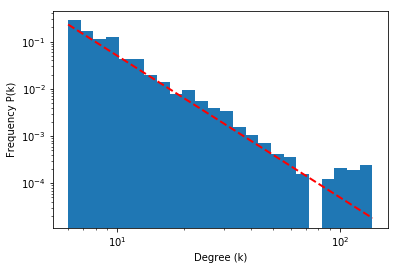

In [10]:
degrees = B.degree()
print('The average degree is [%d].' % mean(degrees))
print('The maximum degree is [%d].' % max(degrees))
print('This graph has [%d] links.' % B.ecount())

# It is known the degree distribution will follow a power law, so we use a log-log plot
bins = np.logspace(np.log10(min(degrees)+1), np.log10(max(degrees)+1), num = 25)
n, bins, hist = plt.hist(degrees, bins=bins, normed=1,log = True)
plt.xscale('log')

# Plot the function P(k) ~ k^(-3)
y = [50*math.pow(x, -3) for x in bins]
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Degree (k)')
plt.ylabel('Frequency P(k)')
plt.show()

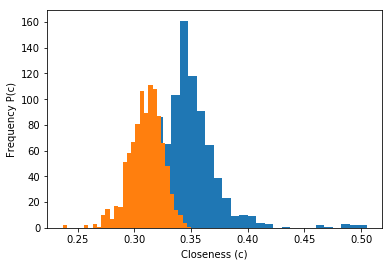

In [11]:
# Let's look at some centrality measures

# There are many...
# Degree centrality, closeness centrality, betweenness centrality, 
# eigenvector centrality, Katz centrality, PageRank centrality,
# percolation centrality, etc. (the list goes on...)
# Look at Wikipedia or a textbook for a quick refresher!

# They each tell you something different about the structural connectivity
# so in practice, you likely use different measures for different networks

# First, look at the closeness
# This measures the reciprocal mean shortest path from each node to each other node
# High closeness = better graph connectivity!
c_G = G.closeness()
c_B = B.closeness()
plt.hist(c_B, bins=30) # Blue = Barabasi-Albert
plt.hist(c_G, bins=30) # Orange = Erdős-Renyi
plt.xlabel('Closeness (c)')
plt.ylabel('Frequency P(c)')
plt.show()

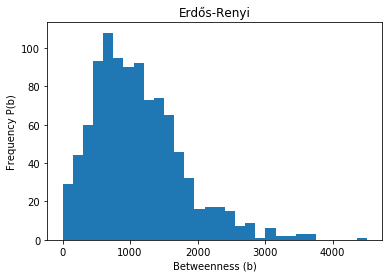

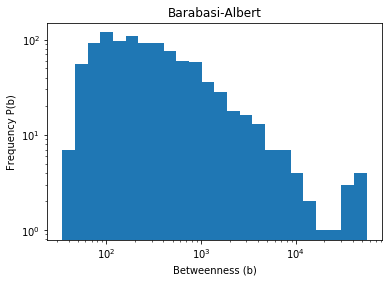

In [12]:
# Let's now look at the betweenness
# This measures the number of times a certain node is part of a 
# shortest path between two other nodes - important for routing!

b_G = G.betweenness()
b_B = B.betweenness()

plt.hist(b_G, bins=30)
plt.xlabel('Betweenness (b)')
plt.ylabel('Frequency P(b)')
plt.title('Erdős-Renyi')
plt.show()

bins = np.logspace(np.log10(min(b_B)+1), np.log10(max(b_B)+1), num = 25)
plt.hist(b_B, bins=bins,log='True')
plt.xscale('log')
plt.xlabel('Betweenness (b)')
plt.ylabel('Frequency P(b)')
plt.title('Barabasi-Albert')
plt.show()

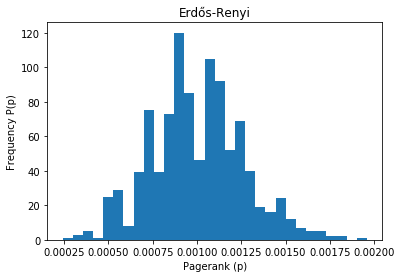

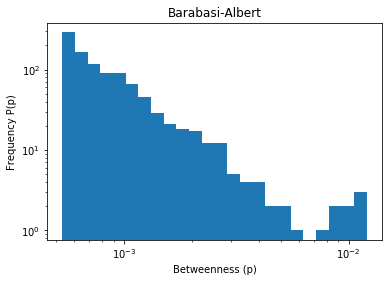

In [13]:
# Finally, we will look at Google's PageRank centrality (Brin & Page, 1998)
# This gives the stationary state of the random walk!

p_G = G.pagerank()
p_B = B.pagerank()

plt.hist(p_G, bins=30)
plt.xlabel('Pagerank (p)')
plt.ylabel('Frequency P(p)')
plt.title('Erdős-Renyi')
plt.show()

bins = np.logspace(np.log10(min(p_B)), np.log10(max(p_B)), num = 25)
plt.hist(p_B, bins=bins,log='True')
plt.xscale('log')
plt.xlabel('Betweenness (p)')
plt.ylabel('Frequency P(p)')
plt.title('Barabasi-Albert')
plt.show()

In [ ]:
# See http://igraph.org/python/doc/igraph.Graph-class.html for more details

In [15]:
# Now let's look at some real data!
# The network of airports can be found at http://openflights.org

A = Graph()

nodes = open('airline_nodes.dat','r')
lines = nodes.readlines()
for line in lines:
    A.add_vertex(line.rstrip())
nodes.close()

edg = []
edges = open('airline_edges.dat','r')
lines = edges.readlines()
for line in lines:
    e1, e2 = line.rstrip().split(',')
    edg += [(e1, e2)]
A.add_edges(edg)
    
print('There are [%d] airports in this network.' % A.vcount())
# print(A.vs['name']) # This is how to access vertex names
print('There are [%d] links in this network.' % A.ecount())

There are [3115] airports in this network.
There are [32419] links in this network.


In [16]:
# Place some number of people at each airport
P = 100
p = [P for x in range(A.vcount())] # This contains the number of people at each node (airport)

In [17]:
# Diffusion Algorithm:
# Look at 'T' timesteps:
T = 1000

# At each step, a fraction 'alpha' of people at a node move to neighbors
alpha = 0.5

# They are divided according to the degree of each neighbor
def diffuse_probs(g, idx): #g is the graph; idx is the node we are looking at
    n = g.neighbors(g.vs[idx])
    d = g.degree(n)
    return n, [x / sum(d) for x in d]

# Begin the diffusion
def diffuse(p):
    for t in range(T):
        i = int(random() * A.vcount()) # Pick a random node whose people will diffuse
        #print('Looking at node [%d].' % i)
        n, dp = diffuse_probs(A, i) # Diffusion coefficients
        n_p = int(p[i] * alpha) # Number of people which will move

        NP = [int(n_p * dp[j]) for j in range(len(n)-1)] # Number moving to each neighbor
        NP.append(n_p - sum(NP)) # The final move (to avoid rounding errors)

        p[i] -= n_p # Decrement people at this node

        for j in range(len(n)):
            p[n[j]] += NP[j] # Increment people at neighbors
            
    return p

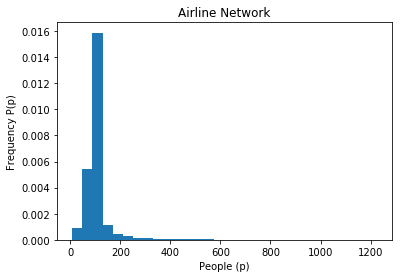

In [18]:
P = 100
plt.hist(diffuse(p), bins=30,normed='True')
plt.xlabel('People (p)')
plt.ylabel('Frequency P(p)')
plt.title('Airline Network')
plt.show()

In [ ]:
# This is an example of graph assortativity and 'rich club' behavior

In [ ]:
# We can also use an SIR model of epidemics to characterize disease outbreak
# S - susceptible to infection
# I - infected
# R - recovered; no longer susceptible

# Optional variations:
# D - dead!
# IM - immune from the start
# T - treated/immunized
# E - exposed (infected but not infectious)

# Everyone starts out susceptible
S = [P for x in range(A.vcount())]
# Nobody is infected, recovered, or dead yet
I = [0 for x in range(A.vcount())]
R = [0 for x in range(A.vcount())]
D = [0 for x in range(A.vcount())]

S_I = 0.8 # Chance susceptible individual becomes infected
I_R = 0.7 # Chance infected individual recovers
I_D = 0.1 # Chance infected invididual dies

# Questions:
# 1. How many days (timesteps) until nobody is infected?
# 2. How many people die?

# Outbreak!
outbreak = int(random() * A.vcount()) # Random node where outbreak occurs
#print('The outbreak occured at node [%d].' % outbreak)
I0 = 0.1 # Fraction of people initially infected
I[outbreak] = S[outbreak] * I0
S[outbreak] -= I[outbreak]

def disease_step(A, s, i, r, d, s_i, i_r, i_d):
    for x in range(A.vcount()): # Iterate through each airport (node)
        if s[x] > 0: # If there are susceptible individuals, they can get infected
            rand = np.random.poisson(s_i * s[x])
            rand = max(0, min(rand, s[x])) # Clamp the value
            s[x] -= rand
            i[x] += rand
        if i[x] > 0: # If there are infected individuals, they can recover
            rand = np.random.poisson(i_r * i[x])
            rand = max(0, min(rand, i[x]))
            i[x] -= rand
            r[x] += rand
        if i[x] > 0: # If there are infected individuals, they can also die
            rand = np.random.poisson(i_d * i[x])
            rand = max(0, min(rand, i[x]))
            i[x] -= rand
            d[x] += rand
    return [s, i, r, d]

In [ ]:
# Now we run out simulation until no more infected remain
step = 0
while sum(I) > 0:
    #print(sum(S), sum(I), sum(R), sum(D))
    S, I, R, D = disease_step(A, S, I, R, D, S_I, I_R, I_D)
    step += 1
#print(sum(S), sum(I), sum(R), sum(D))
print('The epidemic lasted [%d] timesteps.' % step)
print('[%d] people (%f%%) died.' % (sum(D), 100*float(sum(D)) / (P * A.vcount())))
print('[%d] people never got sick.' % sum(S))

In [ ]:
# One can combine the diffusion with the SIRD infection process to then model a more realistic model
# of epidemic spreading... these models can become very involved with many variables

# Age distributions, geographical factors (e.g., treatment quality or climate)
# Certain combinations of diseases can result in partial immunity, or they can kill faster together
# Summary: using graph data structures, you are just doing a big Monte Carlo simulation